### tool 설치

In [1]:
!pip install datasets evaluate transformers[sentencepiece]
!apt install git-lfs
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing insta

### 내 데이터세트가 허브에 없다면?

#### 📌 로컬 데이터 세트 로드

이탈리아어 질문 답변을 위한 대규모 데이터세트인 SQuAD-it 데이터세트를 사용

In [5]:
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-test.json.gz

--2024-01-31 00:57:04--  https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz [following]
--2024-01-31 00:57:05--  https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7725286 (7.4M) [application/octet-stream]
Saving to: ‘SQuAD_it-train.json.gz.1’

SQuAD_it-train.json 100%[===================>]   7.37M  --.-KB/s    in 0.1s    

2024-01-31 00:57:05 (69.9 MB/s) - ‘SQuAD_it-train.json.gz.1’ saved [7725286/7725286]

-

압축 파일이 SQuAD_it-train.json 및 SQuAD_it-test.json 으로 대체되었으며 , 데이터가 JSON 형식으로 저장되어 있는 것을 확인할 수 있습니다.

In [6]:
!gzip -dkv SQuAD_it-*.json.gz

gzip: SQuAD_it-test.json already exists; do you wish to overwrite (y or n)? n
	not overwritten
gzip: SQuAD_it-train.json already exists; do you wish to overwrite (y or n)? n
	not overwritten


JSON 파일을 로드

In [7]:
from datasets import load_dataset

squad_it_dataset = load_dataset("json", data_files="SQuAD_it-train.json", field="data")

Generating train split: 0 examples [00:00, ? examples/s]

 분할된 DatasetDict개체가 생성

In [8]:
squad_it_dataset

DatasetDict({
    train: Dataset({
        features: ['paragraphs', 'title'],
        num_rows: 442
    })
})

In [9]:
squad_it_dataset["train"][0]

{'paragraphs': [{'context': "Il terremoto del Sichuan del 2008 o il terremoto del Gran Sichuan, misurato a 8.0 Ms e 7.9 Mw, e si è verificato alle 02:28:01 PM China Standard Time all' epicentro (06:28:01 UTC) il 12 maggio nella provincia del Sichuan, ha ucciso 69.197 persone e lasciato 18.222 dispersi.",
   'qas': [{'answers': [{'answer_start': 29, 'text': '2008'}],
     'id': '56cdca7862d2951400fa6826',
     'question': 'In quale anno si è verificato il terremoto nel Sichuan?'},
    {'answers': [{'answer_start': 232, 'text': '69.197'}],
     'id': '56cdca7862d2951400fa6828',
     'question': 'Quante persone sono state uccise come risultato?'},
    {'answers': [{'answer_start': 29, 'text': '2008'}],
     'id': '56d4f9902ccc5a1400d833c0',
     'question': 'Quale anno ha avuto luogo il terremoto del Sichuan?'},
    {'answers': [{'answer_start': 78, 'text': '8.0 Ms e 7.9 Mw'}],
     'id': '56d4f9902ccc5a1400d833c1',
     'question': 'Che cosa ha fatto la misura di sisma?'},
    {'answers'

In [10]:
data_files = {"train": "SQuAD_it-train.json", "test": "SQuAD_it-test.json"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")
squad_it_dataset

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['paragraphs', 'title'],
        num_rows: 442
    })
    test: Dataset({
        features: ['paragraphs', 'title'],
        num_rows: 48
    })
})

데이터 세트의 로딩 스크립트는 실제로 입력 파일의 자동 압축 풀기를 지원하므로 인수를 압축 파일에 직접 gzip지정하여 사용을 건너뛸 수 있다!

In [11]:
data_files = {"train": "SQuAD_it-train.json.gz", "test": "SQuAD_it-test.json.gz"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

#### 📌 원격 데이터 세트 로드

In [12]:
url = "https://github.com/crux82/squad-it/raw/master/"
data_files = {
    "train": url + "SQuAD_it-train.json.gz",
    "test": url + "SQuAD_it-test.json.gz",
}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

### 데이터 세트를 정리하는 방법!

우선 데이터 세트(약물 검토 데이터 세트)부터 불러오기

In [13]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip"
!unzip drugsCom_raw.zip

--2024-01-31 00:58:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip        [   <=>              ]  41.00M  79.0MB/s    in 0.5s    

2024-01-31 00:58:55 (79.0 MB/s) - ‘drugsCom_raw.zip’ saved [42989872]

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [16]:
from datasets import load_dataset

data_files = {"train": "drugsComTrain_raw.tsv", "test": "drugsComTest_raw.tsv"}
# \t is the tab character in Python
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

#### 📌 데이터 분할

In [17]:
drug_sample = drug_dataset["train"].shuffle(seed=42).select(range(1000))
# Peek at the first few examples
drug_sample[:3]

{'Unnamed: 0': [87571, 178045, 80482],
 'drugName': ['Naproxen', 'Duloxetine', 'Mobic'],
 'condition': ['Gout, Acute', 'ibromyalgia', 'Inflammatory Conditions'],
 'review': ['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
  '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects."',
  '"I have been taking Mobic for over a year with no side effects other than 

➡︎ 위 출력 결과에 대한 설명!
* 해당 Unnamed: 0열은 의심스럽게 각 환자의 익명화된 ID처럼 보입니다.
* 열에 condition는 대문자와 소문자 레이블이 혼합되어 있습니다.
* 리뷰의 길이는 다양하며 Python 줄 구분 기호(\r\n)와 &\#039; 와 같은 HTML 문자 코드가 혼합되어 있습니다.

In [18]:
# ID 수가 각 분할의 행 수와 일치하는지 확인
for split in drug_dataset.keys():
    # assert는 뒤의 조건이 True가 아니면 AssertError를 발생시킴.
    assert len(drug_dataset[split]) == len(drug_dataset[split].unique("Unnamed: 0"))

In [19]:
# 칼럼명 변경하기
drug_dataset = drug_dataset.rename_column(
    original_column_name="Unnamed: 0", new_column_name="patient_id"
)
drug_dataset

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 161297
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53766
    })
})

<모든 레이블을 정규화하기>

In [ ]:
def lowercase_condition(example):
    return {"condition": example["condition"].lower()}


drug_dataset.map(lowercase_condition)

➡︎ 위 출력 결과를 보면, 열의 일부 항목이 None 문자열이라 소문자로 변환할 수 없다는 에러가 뜬다.

In [21]:
def filter_nones(x):
    return x["condition"] is not None

In [22]:
# filter를 통해 none인 것은 삭제!
drug_dataset = drug_dataset.filter(lambda x: x["condition"] is not None)

Filter:   0%|          | 0/161297 [00:00<?, ? examples/s]

Filter:   0%|          | 0/53766 [00:00<?, ? examples/s]

❊ 참고) Lamda 함수

In [23]:
(lambda x: x * x)(3) # 이 함수를 입력에 적용하려면 해당 함수와 입력을 괄호로 묶어야 합니다.

9

In [25]:
(lambda base, height: 0.5 * base * height)(4, 8)

16.0

이제 아래와 같이 최종적으로 정규화를 한다.

In [26]:
drug_dataset = drug_dataset.map(lowercase_condition)
# Check that lowercasing worked
drug_dataset["train"]["condition"][:3]

Map:   0%|          | 0/160398 [00:00<?, ? examples/s]

Map:   0%|          | 0/53471 [00:00<?, ? examples/s]

['left ventricular dysfunction', 'adhd', 'birth control']

#### 📌 새 열 만들기

review_length 열 만들기

In [27]:
# 각 리뷰의 단어 수를 계산하는 간단한 함수
def compute_review_length(example):
    return {"review_length": len(example["review"].split())}

In [28]:
# map => 데이터세트의 모든 행에 적용되어 새 review_length열이 생성됨.

drug_dataset = drug_dataset.map(compute_review_length)
# Inspect the first training example
drug_dataset["train"][0]

Map:   0%|          | 0/160398 [00:00<?, ? examples/s]

Map:   0%|          | 0/53471 [00:00<?, ? examples/s]

{'patient_id': 206461,
 'drugName': 'Valsartan',
 'condition': 'left ventricular dysfunction',
 'review': '"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 'rating': 9.0,
 'date': 'May 20, 2012',
 'usefulCount': 27,
 'review_length': 17}

새 열을 정렬하기

In [29]:
drug_dataset["train"].sort("review_length")[:3]

{'patient_id': [111469, 13653, 53602],
 'drugName': ['Ledipasvir / sofosbuvir',
  'Amphetamine / dextroamphetamine',
  'Alesse'],
 'condition': ['hepatitis c', 'adhd', 'birth control'],
 'review': ['"Headache"', '"Great"', '"Awesome"'],
 'rating': [10.0, 10.0, 10.0],
 'date': ['February 3, 2015', 'October 20, 2009', 'November 23, 2015'],
 'usefulCount': [41, 3, 0],
 'review_length': [1, 1, 1]}

30단어 미만의 리뷰를 제거하는 기능

In [30]:
drug_dataset = drug_dataset.filter(lambda x: x["review_length"] > 30)
print(drug_dataset.num_rows)

Filter:   0%|          | 0/160398 [00:00<?, ? examples/s]

Filter:   0%|          | 0/53471 [00:00<?, ? examples/s]

{'train': 138514, 'test': 46108}


리뷰에 HTML 문자 코드 제거하기

In [31]:
import html

text = "I&#039;m a transformer called BERT"
html.unescape(text) # 이스케이프 해제하기

"I'm a transformer called BERT"

In [32]:
drug_dataset = drug_dataset.map(lambda x: {"review": html.unescape(x["review"])})

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

#### 📌 map() 함수의 강력한 기능

batch!

In [33]:
# 한 번에 전송하도록 하는 batched 기능! -> 기본값은 1,000
new_drug_dataset = drug_dataset.map(
    lambda x: {"review": [html.unescape(o) for o in x["review"]]}, batched=True
)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

➡︎ list comprehension를 사용하여 동시에 여러 요소를 처리함으로써 속도를 높일 수 있습니다.

In [34]:
# 빠른 토크나이저
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["review"], truncation=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [36]:
# 느린 토크나이저
slow_tokenizer = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=False)


def slow_tokenize_function(examples):
    return slow_tokenizer(examples["review"], truncation=True)

In [35]:
%time tokenized_dataset = drug_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

CPU times: user 1min 59s, sys: 1.15 s, total: 2min
Wall time: 1min 54s


In [37]:
%time tokenized_dataset = drug_dataset.map(tokenize_function, batched=False)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

CPU times: user 2min 45s, sys: 1.85 s, total: 2min 46s
Wall time: 3min 12s


In [38]:
%time tokenized_dataset = drug_dataset.map(tokenize_function, batched=True,  num_proc=8)

Map (num_proc=8):   0%|          | 0/138514 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/46108 [00:00<?, ? examples/s]

CPU times: user 1.73 s, sys: 520 ms, total: 2.25 s
Wall time: 1min 29s


In [39]:
%time tokenized_dataset = drug_dataset.map(tokenize_function, batched=False,  num_proc=8)

Map (num_proc=8):   0%|          | 0/138514 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/46108 [00:00<?, ? examples/s]

CPU times: user 9.19 s, sys: 1.03 s, total: 10.2 s
Wall time: 2min 35s


In [40]:
%time tokenized_dataset = drug_dataset.map(slow_tokenize_function, batched=True)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

CPU times: user 7min 2s, sys: 2.21 s, total: 7min 4s
Wall time: 7min 51s


In [41]:
%time tokenized_dataset = drug_dataset.map(slow_tokenize_function, batched=False)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

CPU times: user 8min 46s, sys: 4.34 s, total: 8min 50s
Wall time: 10min 23s


In [ ]:
%time tokenized_dataset = drug_dataset.map(slow_tokenize_function, batched=True, num_proc=8)

In [ ]:
%time tokenized_dataset = drug_dataset.map(slow_tokenize_function, batched=False, num_proc=8)

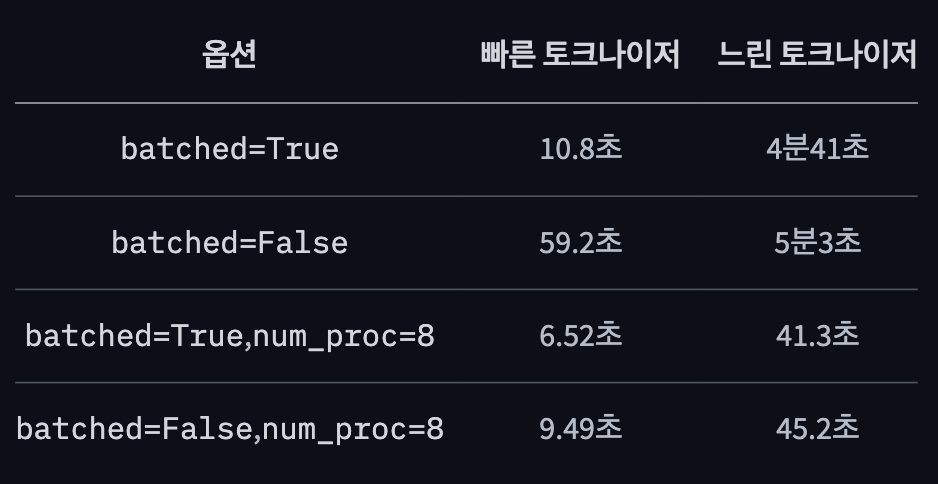

➡︎ 이러한 속도 향상을 달성할 수 있는 이유는 토큰화 코드가 코드 실행을 쉽게 병렬화할 수 있게 해주는 언어인 Rust에서 실행되기 때문입니다.

➡︎  Dataset.map()또한 자체적인 병렬화 기능도 있습니다. map은 Rust의 지원을 받지 않기 때문에 느린 토크나이저가 빠른 토크나이저를 따라잡을 수는 없지만 여전히 도움이 될 수 있습니다

In [44]:
def tokenize_and_split(examples):
    return tokenizer(
        examples["review"],
        truncation=True, # 자름.
        max_length=128, # 최대 길이 128개로 자름.
        return_overflowing_tokens=True, # 모든 텍스트 청크 를 반환하도록 요청
    )

In [45]:
result = tokenize_and_split(drug_dataset["train"][0])
[len(inp) for inp in result["input_ids"]]

[128, 49]

In [46]:
tokenized_dataset = drug_dataset.map(tokenize_and_split, batched=True)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

ArrowInvalid: Column 8 named input_ids expected length 1000 but got length 1463

➡︎ 에러 뜨는 이유: 열 중 하나의 길이가 일치하지 않습니다. 하나는 길이가 1,463이고 다른 하나는 길이가 1,000.

In [47]:
tokenized_dataset = drug_dataset.map(
    tokenize_and_split, batched=True, remove_columns=drug_dataset["train"].column_names # 열 제거하여 에러 해결
)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

In [48]:
len(tokenized_dataset["train"]), len(drug_dataset["train"])

(206772, 138514)

이전 열을 새 열과 동일한 크기로 만들어 길이 불일치 문제를 처리

In [49]:
def tokenize_and_split(examples):
    result = tokenizer(
        examples["review"],
        truncation=True,
        max_length=128,
        return_overflowing_tokens=True, # 이는 새로운 기능 인덱스에서 원래 샘플의 인덱스로의 매핑을 제공
    )
    # Extract mapping between new and old indices
    sample_map = result.pop("overflow_to_sample_mapping")
    for key, values in examples.items():
        result[key] = [values[i] for i in sample_map]
    return result

이전 열을 제거하지 않고도 작동 -> 이전 필드를 모두 유지!

In [50]:
tokenized_dataset = drug_dataset.map(tokenize_and_split, batched=True)
tokenized_dataset

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 206772
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 68876
    })
})

#### 📌 Dataframe에 대해

Dataset을 pandas의 Dataframe으로!

In [51]:
drug_dataset.set_format("pandas")

In [52]:
drug_dataset["train"][:3]

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,95260,Guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,141
1,92703,Lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,134
2,138000,Ortho Evra,birth control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,89


In [53]:
train_df = drug_dataset["train"][:]

In [54]:
frequencies = (
    train_df["condition"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "condition", "condition": "frequency"})
)
frequencies.head()

,condition,frequency
0,birth control,27655
1,depression,8023
2,acne,5209
3,anxiety,4991
4,pain,4744


pandas의 Dataframe을 Dataset으로!

In [55]:
from datasets import Dataset

freq_dataset = Dataset.from_pandas(frequencies)
freq_dataset

Dataset({
    features: ['condition', 'frequency'],
    num_rows: 819
})

#### 📌 Validation dataset 생성

In [56]:
drug_dataset.reset_format()

In [57]:
drug_dataset_clean = drug_dataset["train"].train_test_split(train_size=0.8, seed=42)
# Rename the default "test" split to "validation"
drug_dataset_clean["validation"] = drug_dataset_clean.pop("test") # 별도의 검증세트 두기
# Add the "test" set to our `DatasetDict`
drug_dataset_clean["test"] = drug_dataset["test"]
drug_dataset_clean

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 46108
    })
})

#### 📌 데이터셋 저장하기

Arrow 형식으로 저장

In [58]:
drug_dataset_clean.save_to_disk("drug-reviews")

Saving the dataset (0/1 shards):   0%|          | 0/110811 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/27703 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/46108 [00:00<?, ? examples/s]

In [59]:
from datasets import load_from_disk

drug_dataset_reloaded = load_from_disk("drug-reviews")
drug_dataset_reloaded

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 46108
    })
})

CSV 및 JSON 형식의 경우 각 분할을 별도의 파일로 저장해야 합니다.

In [60]:
for split, dataset in drug_dataset_clean.items():
    dataset.to_json(f"drug-reviews-{split}.jsonl")

Creating json from Arrow format:   0%|          | 0/111 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/47 [00:00<?, ?ba/s]

In [61]:
!head -n 1 drug-reviews-train.jsonl

{"patient_id":89879,"drugName":"Cyclosporine","condition":"keratoconjunctivitis sicca","review":"\"I have used Restasis for about a year now and have seen almost no progress.  For most of my life I've had red and bothersome eyes. After trying various eye drops, my doctor recommended Restasis.  He said it typically takes 3 to 6 months for it to really kick in but it never did kick in.  When I put the drops in it burns my eyes for the first 30 - 40 minutes.  I've talked with my doctor about this and he said it is normal but should go away after some time, but it hasn't. Every year around spring time my eyes get terrible irritated  and this year has been the same (maybe even worse than other years) even though I've been using Restasis for a year now. The only difference I notice was for the first couple weeks, but now I'm ready to move on.\"","rating":2.0,"date":"April 20, 2013","usefulCount":69,"review_length":147}


In [62]:
data_files = {
    "train": "drug-reviews-train.jsonl",
    "validation": "drug-reviews-validation.jsonl",
    "test": "drug-reviews-test.jsonl",
}
drug_dataset_reloaded = load_dataset("json", data_files=data_files)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

### 빅데이터 처리 방법!

#### Pile

"PILE"은 "Publicly Available Large-scale Dataset for Language Modeling"의 약어로, 대규모 언어 모델 학습을 위해 공개된 대규모 데이터셋

In [63]:
!pip install zstandard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 13.6 MB/s eta 0:00:00


 원격 파일 로드

In [66]:
from datasets import load_dataset

# This takes a few minutes to run, so go grab a tea or coffee while you wait :)
data_files = "https://the-eye.eu/public/AI/pile_preliminary_components/PUBMED_title_abstracts_2019_baseline.jsonl.zst"
pubmed_dataset = load_dataset("json", data_files=data_files, split="train")
pubmed_dataset

FileNotFoundError: Unable to find 'https://the-eye.eu/public/AI/pile_preliminary_components/PUBMED_title_abstracts_2019_baseline.jsonl.zst'

In [ ]:
pubmed_dataset[0]

#### Memory mapping

psutil 라이브러리 사용하여 메모리 사용량 측정하기

In [ ]:
!pip install psutil

다음과 같이 현재 프로세스의 메모리 사용량을 확인할 수 있는 클래스를 제공

In [ ]:
import psutil

# Process.memory_info is expressed in bytes, so convert to megabytes
print(f"RAM used: {psutil.Process().memory_info().rss / (1024 * 1024):.2f} MB")

In [ ]:
print(f"Number of files in dataset : {pubmed_dataset.dataset_size}")
size_gb = pubmed_dataset.dataset_size / (1024**3)
print(f"Dataset size (cache file) : {size_gb:.2f} GB")

➡︎ 거의 20GB에 달하는 용량에도 불구하고 훨씬 적은 RAM으로 데이터 세트를 로드하고 액세스할 수 있다!

<Hugging Face의 "Datasets"라이브러리 메모리 관리>
* 각 데이터셋을 메모리 맵 파일(memory-mapped file)로 다룹니다.
* 메모리 맵 파일은 RAM과 파일 시스템 저장소 간의 매핑을 제공하며, 이를 통해 라이브러리는 데이터셋을 완전히 메모리에 로드하지 않고도 데이터셋의 요소에 액세스하고 작업할 수 있습니다.
* 메모리 맵 파일은 여러 프로세스 간에 공유될 수 있어, Dataset.map()과 같은 메소드를 데이터셋을 복사하거나 이동하지 않고도 병렬화할 수 있도록 합니다.
* Apache Arrow 메모리 포맷과 pyarrow 라이브러리를 기반으로 하며, 데이터 로딩과 처리를 빠르게 만든다.

In [ ]:
import timeit

code_snippet = """batch_size = 1000

for idx in range(0, len(pubmed_dataset), batch_size):
    _ = pubmed_dataset[idx:idx + batch_size]
"""

time = timeit.timeit(stmt=code_snippet, number=1, globals=globals())
print(
    f"Iterated over {len(pubmed_dataset)} examples (about {size_gb:.1f} GB) in "
    f"{time:.1f}s, i.e. {size_gb/time:.3f} GB/s"
)

* timeit 모듈을 사용하여 code_snippet의 실행 시간을 측정


#### Streaming datasets

스트리밍 기능을 사용하면, 전체 데이터셋을 다운로드하지 않고도 필요한 부분을 실시간으로 다운로드하고 액세스할 수 있다.

In [ ]:
pubmed_dataset_streamed = load_dataset(
    "json", data_files=data_files, split="train", streaming=True
)

다음과 같이 스트리밍된 데이터 세트의 첫 번째 요소에 액세스할 수 있습니다.

In [ ]:
next(iter(pubmed_dataset_streamed))

출력이 하나씩 반환된다

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokenized_dataset = pubmed_dataset_streamed.map(lambda x: tokenizer(x["text"]))
next(iter(tokenized_dataset))

사전 정의된 요소만 섞는다. ->  버퍼의 처음 10,000개 예에서 무작위 예를 선택

In [ ]:
shuffled_dataset = pubmed_dataset_streamed.shuffle(buffer_size=10_000, seed=42)
next(iter(shuffled_dataset))

 처음 5개의 예를 선택

In [ ]:
dataset_head = pubmed_dataset_streamed.take(5)
list(dataset_head)

* 처음 1000 개 -> validation
* 나머지 -> training

In [ ]:
# Skip the first 1,000 examples and include the rest in the training set
train_dataset = shuffled_dataset.skip(1000)
# Take the first 1,000 examples for the validation set
validation_dataset = shuffled_dataset.take(1000)

In [ ]:
law_dataset_streamed = load_dataset(
    "json",
    data_files="https://the-eye.eu/public/AI/pile_preliminary_components/FreeLaw_Opinions.jsonl.zst",
    split="train",
    streaming=True,
)
next(iter(law_dataset_streamed))

In [ ]:
from itertools import islice
from datasets import interleave_datasets

combined_dataset = interleave_datasets([pubmed_dataset_streamed, law_dataset_streamed])
list(islice(combined_dataset, 2))

In [ ]:
base_url = "https://the-eye.eu/public/AI/pile/"
data_files = {
    "train": [base_url + "train/" + f"{idx:02d}.jsonl.zst" for idx in range(30)],
    "validation": base_url + "val.jsonl.zst",
    "test": base_url + "test.jsonl.zst",
}
pile_dataset = load_dataset("json", data_files=data_files, streaming=True)
next(iter(pile_dataset["train"]))

### 나만의 데이터 세트 만들기

#### 데이터 가져오기

In [2]:
!git config --global user.email "duwltn1301@naver.com"
!git config --global user.name "YeoJiSu"

In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
!pip install requests

In [5]:
import requests

url = "https://api.github.com/repos/huggingface/datasets/issues?page=1&per_page=1"
response = requests.get(url)

In [6]:
response.status_code

200

In [7]:
response.json()

[{'url': 'https://api.github.com/repos/huggingface/datasets/issues/6632',
  'repository_url': 'https://api.github.com/repos/huggingface/datasets',
  'labels_url': 'https://api.github.com/repos/huggingface/datasets/issues/6632/labels{/name}',
  'comments_url': 'https://api.github.com/repos/huggingface/datasets/issues/6632/comments',
  'events_url': 'https://api.github.com/repos/huggingface/datasets/issues/6632/events',
  'html_url': 'https://github.com/huggingface/datasets/pull/6632',
  'id': 2108541678,
  'node_id': 'PR_kwDODunzps5lfPuk',
  'number': 6632,
  'title': 'Fix reload cache with data dir',
  'user': {'login': 'lhoestq',
   'id': 42851186,
   'node_id': 'MDQ6VXNlcjQyODUxMTg2',
   'avatar_url': 'https://avatars.githubusercontent.com/u/42851186?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/lhoestq',
   'html_url': 'https://github.com/lhoestq',
   'followers_url': 'https://api.github.com/users/lhoestq/followers',
   'following_url': 'https://api.github.com/

In [8]:
GITHUB_TOKEN = ""  # Copy your GitHub token here
headers = {"Authorization": f"token {GITHUB_TOKEN}"}

GitHub 저장소에서 모든 이슈를 다운로드할 수 있는 함수

In [9]:
import time
import math
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm


def fetch_issues(
    owner="huggingface",
    repo="datasets",
    num_issues=10_000,
    rate_limit=5_000,
    issues_path=Path("."),
):
    if not issues_path.is_dir():
        issues_path.mkdir(exist_ok=True)

    batch = []
    all_issues = []
    per_page = 100  # Number of issues to return per page
    num_pages = math.ceil(num_issues / per_page)
    base_url = "https://api.github.com/repos"

    for page in tqdm(range(num_pages)):
        # Query with state=all to get both open and closed issues
        query = f"issues?page={page}&per_page={per_page}&state=all"
        issues = requests.get(f"{base_url}/{owner}/{repo}/{query}", headers=headers)
        batch.extend(issues.json())

        if len(batch) > rate_limit and len(all_issues) < num_issues:
            all_issues.extend(batch)
            batch = []  # Flush batch for next time period
            print(f"Reached GitHub rate limit. Sleeping for one hour ...")
            time.sleep(60 * 60 + 1)

    all_issues.extend(batch)
    df = pd.DataFrame.from_records(all_issues)
    df.to_json(f"{issues_path}/{repo}-issues.jsonl", orient="records", lines=True)
    print(
        f"Downloaded all the issues for {repo}! Dataset stored at {issues_path}/{repo}-issues.jsonl"
    )

In [ ]:
# Depending on your internet connection, this can take several minutes to run...
fetch_issues()

  0%|          | 0/100 [00:00<?, ?it/s]

Reached GitHub rate limit. Sleeping for one hour ...


로컬로 로드

In [ ]:
issues_dataset = load_dataset("json", data_files="datasets-issues.jsonl", split="train")
issues_dataset

#### 데이터 정리

Datasets 라이브러리를 사용하여 GitHub 리포지토리의 이슈와 풀 리퀘스트를 가져온 후, 이 중에서 실제 이슈만을 데이터셋으로 만들기 위한 작업

* GitHub의 REST API v3에서는 모든 풀 리퀘스트를 이슈로 간주.
* "Issues" 엔드포인트를 통해 응답을 받을 때 풀 리퀘스트인지 이슈인지를 구분하기 위해 "pull_request" 키를 사용할 수 있다.
* 그러나 이슈와 풀 리퀘스트의 내용이 다르기 때문에, 이 두 유형을 구분하기 위한 작은 전처리(preprocessing)를 수행하는 것이 필요.

In [ ]:
sample = issues_dataset.shuffle(seed=666).select(range(3))

# Print out the URL and pull request entries
for url, pr in zip(sample["html_url"], sample["pull_request"]):
    print(f">> URL: {url}")
    print(f">> Pull request: {pr}\n")

issue 데이터셋만 가져오기!

In [ ]:
issues_dataset = issues_dataset.map(
    lambda x: {"is_pull_request": False if x["pull_request"] is None else True}
)

#### 데이터세트 보강

GitHub REST API는 문제 번호와 관련된 모든 설명을 반환하는 Comments엔드포인트를 제공합니다.

In [ ]:
issue_number = 2792
url = f"https://api.github.com/repos/huggingface/datasets/issues/{issue_number}/comments"
response = requests.get(url, headers=headers)
response.json()

모든 댓글을 반환하는 간단한 함수

In [ ]:
def get_comments(issue_number):
    url = f"https://api.github.com/repos/huggingface/datasets/issues/{issue_number}/comments"
    response = requests.get(url, headers=headers)
    return [r["body"] for r in response.json()]


# Test our function works as expected
get_comments(2792)

In [ ]:
# Depending on your internet connection, this can take a few minutes...
issues_with_comments_dataset = issues_dataset.map(
    lambda x: {"comments": get_comments(x["number"])}
)

#### Hugging Face Hub에 데이터 세트 업로드

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
issues_with_comments_dataset.push_to_hub("github-issues")

In [ ]:
remote_dataset = load_dataset("lewtun/github-issues", split="train")
remote_dataset

### FAISS를 이용한 의미 검색

* 임베딩(Embedding)을 사용하여 의미적 검색(semantic search) 엔진을 개발하는 방법
* 이러한 검색 엔진은 쿼리와 문서 간의 키워드 일치를 기반으로 하는 기존의 방식에 비해 여러 이점을 제공
* 의미적 검색은 단순한 키워드 매칭이 아니라 문맥과 의미를 고려하여 유사한 문서를 찾을 수 있음.

#### dataset 로드 및 준비

In [ ]:
from datasets import load_dataset

issues_dataset = load_dataset("lewtun/github-issues", split="train")
issues_dataset

* pull request는 사용자 쿼리에 응답하는 데 거의 사용되지 않고, 검색 엔진에 노이즈를 추가할 수 있기 때문에 필터링한다.
* 또한 댓글이 없는 행도 필터링하여 사용자 쿼리에 대한 답변이 없는 행을 제거

In [ ]:
issues_dataset = issues_dataset.filter(
    lambda x: (x["is_pull_request"] == False and len(x["comments"]) > 0)
)
issues_dataset

필요있는 columns만 남기고 나머지 column들은 삭제

In [ ]:
columns = issues_dataset.column_names
columns_to_keep = ["title", "body", "html_url", "comments"]
columns_to_remove = set(columns_to_keep).symmetric_difference(columns)
issues_dataset = issues_dataset.remove_columns(columns_to_remove)
issues_dataset

 * 임베딩을 생성하기 위해 각 댓글에 이슈의 제목과 본문을 추가하고, 현재 댓글 열이 각 이슈에 대한 댓글 목록으로 되어 있으므로 이 열을 explode하여 각 행이 (html_url, title, body, comment) 튜플로 구성되도록 한다.
 * 여기서 "폭발(explode)"란 Pandas DataFrame에서 리스트 형태의 열을 풀어서(펼쳐서) 각 요소를 새로운 행으로 만드는 것
 * 각 요소를 별도의 행으로 확장하면 데이터를 더 쉽게 처리할 수 있다.

In [ ]:
issues_dataset.set_format("pandas")
df = issues_dataset[:]

In [ ]:
df["comments"][0].tolist()

In [ ]:
comments_df = df.explode("comments", ignore_index=True)
comments_df.head(4)

In [ ]:
from datasets import Dataset

comments_dataset = Dataset.from_pandas(comments_df)
comments_dataset

In [ ]:
comments_dataset = comments_dataset.map(
    lambda x: {"comment_length": len(x["comments"].split())}
)

In [ ]:
comments_dataset = comments_dataset.filter(lambda x: x["comment_length"] > 15)
comments_dataset

In [ ]:
# issue title, description, and comments 병합
def concatenate_text(examples):
    return {
        "text": examples["title"]
        + " \n "
        + examples["body"]
        + " \n "
        + examples["comments"]
    }


comments_dataset = comments_dataset.map(concatenate_text)

#### 텍스트 임베딩 만들기

* sentence-transformers that is dedicated to creating embeddings.
* embeddings를 생성하는데에 가장 적합한 모델의 checkpoint를 들고옴.

In [ ]:
from transformers import AutoTokenizer, AutoModel

model_ckpt = "sentence-transformers/multi-qa-mpnet-base-dot-v1"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)

In [ ]:
import torch

device = torch.device("cuda")
model.to(device)

각 GitHub 이슈 코퍼스의 항목을 단일 벡터로 나타내기 위해 토큰 임베딩을 "풀링(pool)" 또는 평균화해야 한다

In [ ]:
# 특별한 [CLS] 토큰에 대한 마지막 숨겨진 상태를 수집하는 방식
# 전체 문장의 의미를 요약하는 데 도움
def cls_pooling(model_output):
    return model_output.last_hidden_state[:, 0]

In [ ]:
def get_embeddings(text_list):
    encoded_input = tokenizer(
        text_list, padding=True, truncation=True, return_tensors="pt"
    )
    encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
    model_output = model(**encoded_input)
    return cls_pooling(model_output)

첫 번째 텍스트 항목을 입력하고 출력 모양을 검사하여 함수 작동을 테스트

In [ ]:
embedding = get_embeddings(comments_dataset["text"][0])
embedding.shape

In [ ]:
embeddings_dataset = comments_dataset.map(
    lambda x: {"embeddings": get_embeddings(x["text"]).detach().cpu().numpy()[0]}
)

#### 효율적인 유사성 검색을 위해 FAISS 사용

* 이제 임베딩 데이터세트가 있으므로 이를 검색할 수 있는 방법이 필요합니다.
* FAISS 인덱스 라고 하는 데이터 세트의 특수 데이터 구조를 사용합니다 .
* FAISS (Facebook AI 유사성 검색의 약어)는 임베딩 벡터를 빠르게 검색하고 클러스터링하는 효율적인 알고리즘을 제공하는 라이브러리입니다.
* 입력 임베딩과 유사한 임베딩을 찾을 수 있는 인덱스 라는 특수 데이터 구조를 만드는 것

In [ ]:
embeddings_dataset.add_faiss_index(column="embeddings")

In [ ]:
question = "How can I load a dataset offline?"
question_embedding = get_embeddings([question]).cpu().detach().numpy()
question_embedding.shape

최근접 이웃 조회를 수행하여 이 인덱스에 대한 쿼리를 수행

In [ ]:
scores, samples = embeddings_dataset.get_nearest_examples(
    "embeddings", question_embedding, k=5
)

In [ ]:
import pandas as pd

samples_df = pd.DataFrame.from_dict(samples)
samples_df["scores"] = scores
samples_df.sort_values("scores", ascending=False, inplace=True)

이제 처음 몇 행을 반복하여 쿼리가 사용 가능한 주석과 얼마나 잘 일치하는지 확인할 수 있습니다.

In [ ]:
for _, row in samples_df.iterrows():
    print(f"COMMENT: {row.comments}")
    print(f"SCORE: {row.scores}")
    print(f"TITLE: {row.title}")
    print(f"URL: {row.html_url}")
    print("=" * 50)
    print()